# Initial database
For more information on the pyECG module: 
https://www.researchgate.net/publication/331012096_PyECG_A_software_tool_for_the_analysis_of_the_QT_interval_in_the_electrocardiogram

https://pypi.org/project/pyECG/

In [21]:
# Importing packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyecg import ECGRecord

## WFDB file formats
### Header files
The record line
E.g. S0250ECG 8 1000 1256376 15:26:59 2006
- Record name: S0250ECG
- Number of signals: 8
- Sampling frequency (in samples per second per signal): 1000
- Number of samples per signal: 1256376
- Base time (time of day corresponding with the beginning of the record): 15:26:59
- Base date: 2006 (this is in the wrong format in the database, a quick fix is just removing it from the header but this may be annoying)

Signal specification lines
Each of the non-empty, non-comment lines following the record line represent 1 signal.
E.g. S0250ECG.dat 16 1(0)/uV 16 0 -88 25184 0 ecg_0
- File name (of where the signal is stored): S0250ECG.dat
- Format: 16-bit-amplitudes (see documentation on signal files)
- ADC gain: 1 (uV)
- Baseline: 0 (uV)
- ADC resolution (bits): 16
- ADC zero: 0
- initial value (of signal): -88
- checksum (used to verify that the file hasn't been corrupted): 25184
- block size: 0
- Description: 'ecg_0'

For more information on header files: https://archive.physionet.org/physiotools/wag/header-5.htm

### Signal files...
Info can be found here: https://archive.physionet.org/physiotools/wag/signal-5.htm

In [15]:
path = "./database/ecgdata/" #Change the location of the file or folder.
files = sorted(os.listdir(path))
files.pop(0)
dataset = []
lead_names = ['ecg_0','ecg_1']

#Deleting the '2006' string to be able to read the data.
for file in files:
    if file.endswith('.hea'):
        for lead in lead_names:
            dataset.append(file + "/" + lead)
        fin = open(path + file,"rt") #Change the location of the file or folder.
        data_file = fin.read()
        # More efficient way of doing this would be to delete the last number in the top line of each file
        data_file = data_file.replace('2006','')
        data_file = data_file.replace('2007','')
        data_file = data_file.replace('2008','')
        fin = open(path + file,"wt") #Change the location of the file or folder.
        fin.write(data_file)
        fin.close()

database_ecg = pd.DataFrame (columns = dataset)

for file in files:
    if file.endswith('.hea'):
        #Reading and storing the data into a dataframe.
        hea_path = path + file #Change the location of the file or folder.
        record = ECGRecord.from_wfdb(hea_path)
        for lead in lead_names:
            time = record.time
            signal = record.get_lead(lead)
            database_ecg[file + "/" + lead] = pd.Series(signal)
         

In [16]:
database_ecg.head()

,S0250ECG.hea/ecg_0,S0250ECG.hea/ecg_1,S0256ECG.hea/ecg_0,S0256ECG.hea/ecg_1,S0282ECG.hea/ecg_0,S0282ECG.hea/ecg_1,S0283ECG.hea/ecg_0,S0283ECG.hea/ecg_1,S0288ECG.hea/ecg_0,S0288ECG.hea/ecg_1,...,S0405ECG.hea/ecg_0,S0405ECG.hea/ecg_1,S0406ECG.hea/ecg_0,S0406ECG.hea/ecg_1,S0409ECG.hea/ecg_0,S0409ECG.hea/ecg_1,S0411ECG.hea/ecg_0,S0411ECG.hea/ecg_1,S0424ECG.hea/ecg_0,S0424ECG.hea/ecg_1
0,-88.0,-483.0,21.0,-130.0,-138.0,-119.0,508.0,301.0,388.0,782.0,...,-215.0,-285.0,-972.0,64.0,-19.0,344.0,7.0,720.0,10.0,-98.0
1,-93.0,-496.0,21.0,-123.0,-141.0,-130.0,510.0,301.0,389.0,774.0,...,-212.0,-288.0,-970.0,54.0,-25.0,349.0,9.0,1179.0,10.0,-98.0
2,-99.0,-509.0,20.0,-114.0,-143.0,-141.0,515.0,303.0,391.0,769.0,...,-212.0,-289.0,-966.0,43.0,-32.0,353.0,5.0,1600.0,12.0,-98.0
3,-104.0,-520.0,21.0,-102.0,-147.0,-153.0,523.0,308.0,392.0,763.0,...,-211.0,-290.0,-961.0,33.0,-38.0,358.0,6.0,1870.0,13.0,-96.0
4,-110.0,-533.0,19.0,-92.0,-149.0,-164.0,526.0,311.0,393.0,755.0,...,-207.0,-289.0,-957.0,25.0,-44.0,363.0,7.0,2140.0,12.0,-95.0


In [12]:
# Importing the other patient variables
# Not that not all of the patients have ECG readings associated with them, remember to clean this later...
# Using the appropriate dovument in the data_description folder

df_csv = pd.read_csv('./database/data_description/GE-75_data_summary_table.csv', encoding = 'latin-1')
df_csv.set_index('patient ID', inplace=True)
df_csv

,study,Group,template,Diabetes Duration,HTN or not,HTN2,age,sex,Gender,HEIGHT (M),...,Clock: Memory,Clock: Ex Funct.,Clock: Total Score,WTAR: Raw Score,WTAR: Std Score,BADS Total Responses,GDS Total Response,IADL,MMSE Total,MMSE: Comp Norms
patient ID,,,,,,,,,,,,,,,,,,,,,
S0250,GE75,DM,NaN,7.0,NaN,NaN,50,Male,NaN,1.790,...,4.0,4.0,8.0,24.0,86.0,30.0,20.0,1.0,27.0,28.0
S0254,GE75,CONTROL,Modified,0.0,ntn,NaN,69,Female,NaN,1.531,...,4.0,3.0,7.0,32.0,99.0,4.0,0.0,0.0,29.0,29.0
S0255,GE75,DM,NaN,3.0,NaN,NaN,78,Female,NaN,1.520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S0256,GE75,DM,Modified,23.0,ntn,NaN,65,Female,NaN,1.575,...,3.0,3.0,6.0,44.0,117.0,0.0,2.0,2.0,30.0,29.0
s0257,GE75,CONTROL,NaN,0.0,NaN,NaN,55,Male,NaN,1.700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S0435,GE75,CONTROL,Modified,NaN,HTN,NaN,80,Male,NaN,1.750,...,3.0,3.0,6.0,34.0,103.0,4.0,6.0,0.0,27.0,27.0
s0437,GE75,DM,NaN,NaN,NaN,NaN,54,Male,NaN,1.754,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s0438,GE75,DM,NaN,NaN,NaN,NaN,60,Male,NaN,1.798,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


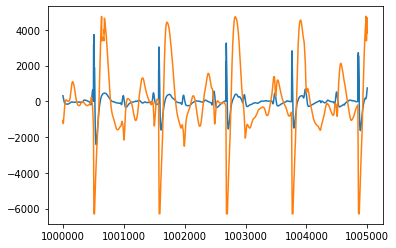

In [38]:
# visualise the 250 ecgs
#database_ecg["S0250ECG.hea/ecg_0"].plot()
#database_ecg["S0250ECG.hea/ecg_1"].plot()

database_ecg["S0250ECG.hea/ecg_0"][1000000:1005000].plot()
database_ecg["S0250ECG.hea/ecg_1"][1000000:1005000].plot()
#plt.hold(True)

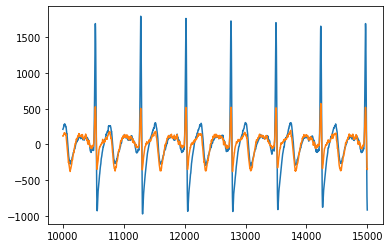

In [33]:
# CONTROL
database_ecg["S0283ECG.hea/ecg_0"][10000:15000].plot()
database_ecg["S0283ECG.hea/ecg_1"][10000:15000].plot()

#database_ecg["S0283ECG.hea/ecg_0"].plot()
#database_ecg["S0283ECG.hea/ecg_1"].plot()

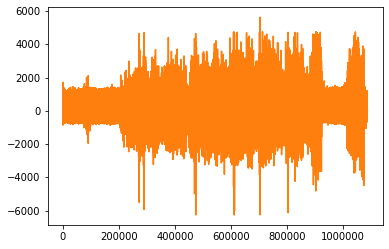

In [36]:
# Diabetic #2
#database_ecg["S0282ECG.hea/ecg_0"][10000:15000].plot()
#database_ecg["S0282ECG.hea/ecg_1"][10000:15000].plot()

database_ecg["S0282ECG.hea/ecg_0"].plot()
database_ecg["S0282ECG.hea/ecg_1"].plot()